In [1]:
import os
import sys

import numpy as np
import pandas as pd

from tqdm import tqdm
from IPython.display import clear_output

import matplotlib as mpl 
import matplotlib.pyplot as plt

sys.path.insert(0, '../../icenumerics/')
sys.path.insert(0, './auxnumerics/')
import icenumerics as ice

import auxiliary as aux
import montecarlo_tools as mc
import chirality_tools as chir
from parameters import params,QUENCH
ureg = ice.ureg

%reload_ext autoreload
%autoreload 2

idx = pd.IndexSlice

In [2]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [11]:
datasmol = '../data/sims/10'
databig = '../data/sims/30'

In [7]:
def do_vertices_shit(data_path):
    vrt_path = os.path.join(data_path,"vertices/")
    vertices = aux.getVerticesDict(vrt_path)
    counts = aux.getVerticesCount(vertices)
    vrt_ts = aux.getVerticesAverage(counts,params["framespersec"])
    types = vrt_ts.columns.to_list()[1:]
    t = vrt_ts["time"].to_numpy()
    vrt_counts = vrt_ts[types].to_numpy()
    return t, vrt_counts

In [44]:
vrt_path = os.path.join(datasmol,"vertices/")
vertices = aux.getVerticesDict(vrt_path)
counts = aux.getVerticesCount(vertices)

In [36]:
good_frames = counts['10'].index.get_level_values('frame').unique().to_list()


In [45]:
for r,experiment in counts.items():
    cur_counts = experiment.loc[idx[good_frames,:]]
    cur_counts['realization'] = [int(r)]*len(cur_counts)
    
    if int(r)==1:
        cur_counts.to_csv('../data/sims/10/counts.csv')
    else:
        cur_counts.to_csv('../data/sims/10/counts.csv',mode='a',header=False)
    

# A bit messy, but lets go back

In [50]:
csmall = pd.read_csv(os.path.join(datasmol,'counts.csv'), index_col=['realization','frame','type'])
cbig = pd.read_csv(os.path.join(databig,'counts.csv'), index_col=['realization','frame','type'])

In [69]:
csmallav = pd.DataFrame()
cbigav = pd.DataFrame()

In [70]:
for vtype, dftype in csmall.groupby('type'):
    
    typeall = [singlertype.fraction.to_list() for r, singlertype in dftype.groupby('realization')]
    csmallav[vtype] = np.array(typeall).mean(axis=0)
        

In [72]:
for vtype, dftype in cbig.groupby('type'):
    
    typeall = [singlertype.fraction.to_list() for r, singlertype in dftype.groupby('realization')]
    cbigav[vtype] = np.array(typeall).mean(axis=0)

In [213]:
time = [i for i in range(len(csmallav))]
field = [10/300*ti for ti in time]
types = ['I-VI','II-V','III','IV']
yticks = [0,0.3,0.6]

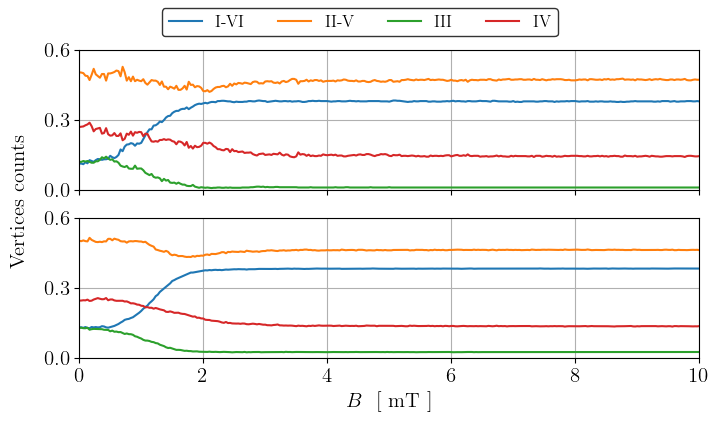

In [223]:
fig, axes = plt.subplots(2,1,figsize=(8,4))

ax = axes[0]
ax.plot(field,csmallav['I'] + csmallav['VI'])
ax.plot(field,csmallav['II'] +csmallav['V'] )
ax.plot(field,csmallav['III'])
ax.plot(field,csmallav['IV'])

ax.set_xlim(0,10)
ax.set_ylim(0,0.6)
ax.set_xticklabels([])
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid()

ax = axes[1]
ax.plot(field,cbigav['I'] + cbigav['VI'])
ax.plot(field,cbigav['II'] +cbigav['V'] )
ax.plot(field,cbigav['III'])
ax.plot(field,cbigav['IV'])

ax.set_xlim(0,10)
ax.set_ylim(0,0.6)
ax.set_xlabel("$B$ \,\,[ mT ] ", fontsize=15)
ax.set_yticks(yticks)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid()



#ax.legend(types, fontsize=12,title='Type', title_fontsize=15, edgecolor='black')
fig.text(0.05,0.5,
         'Vertices counts',
         horizontalalignment='center',
         verticalalignment='center',
         rotation='vertical',
         fontsize=15)
fig.legend(types,
        ncol=6,
        fontsize=12,
        edgecolor='black',
        loc=('upper center')
        )
plt.show()

fig.savefig('../data/figs/fig2.pdf', bbox_inches='tight')
fig.savefig('../data/figs/fig2.png', dpi=300, bbox_inches='tight')